# chargement des bibliotheques



In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


chargement du datasets


In [2]:
# Dataframe
path_df = "data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

remarque: les donnees sont déja traiter dans le file traitement_text

verifier les dimension des donnes entreés (features)

In [3]:
print(features_test.shape)
print(features_train.shape)

(334, 300)
(1891, 300)


dataset est deja subdiviser en deux (partie de apprentissage et partie du teste)

#  initialiser les parametres de cross validation 


In [4]:
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
class_weight = ['balanced', None]
penalty = ['l2']
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


#  recherche des parametres


In [5]:
lrc = LogisticRegression(random_state=8)
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=8, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], 'multi_class': ['multinomial'], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 'class_weight': ['balanced', None], 'penalty': ['l2']},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

 Le code au-dessus retourne les meilleurs paramètres à utiliser pour avoir les bon résultats de classifications

In [6]:
print("les paramètres doit utiliser :")
print(random_search.best_params_)
print("")
print("la moyen du taux de reussite en utilisant ces paramètres :")
print(random_search.best_score_)

les paramètres doit utiliser :
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.0}

la moyen du taux de reussite en utilisant ces paramètres :
0.9566367001586462


# appliquer le modéle sur dataset et evaluation

appliquer le modele sur les donneés de entrainement (input =liste des documents, liste des classes)

In [7]:
lrc.fit(features_train, labels_train)

C:\Users\lamsy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lamsy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=8, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

recrvoir les prediction pour les donneés reserver pour le teste 

In [8]:
lrc_pred = lrc.predict(features_test)

In [9]:
lrc_pred


array([3, 2, 0, 0, 0, 0, 1, 0, 3, 3, 2, 1, 3, 4, 2, 0, 4, 3, 2, 4, 3, 0,
       1, 3, 3, 0, 4, 0, 4, 3, 2, 1, 4, 1, 1, 0, 2, 4, 2, 4, 0, 3, 3, 1,
       0, 1, 3, 2, 2, 3, 4, 1, 0, 2, 0, 1, 3, 0, 2, 4, 2, 4, 0, 0, 2, 0,
       1, 2, 2, 4, 4, 0, 3, 3, 2, 3, 3, 1, 4, 0, 4, 4, 2, 4, 2, 4, 3, 4,
       1, 0, 0, 2, 2, 1, 1, 0, 4, 1, 0, 0, 2, 2, 4, 3, 0, 2, 0, 3, 3, 3,
       2, 2, 3, 2, 4, 0, 4, 2, 3, 2, 0, 2, 0, 0, 0, 1, 0, 3, 4, 1, 4, 3,
       0, 3, 0, 4, 3, 2, 1, 0, 3, 1, 3, 0, 3, 0, 1, 1, 0, 1, 3, 0, 2, 4,
       3, 1, 1, 4, 0, 2, 0, 0, 3, 3, 3, 0, 2, 3, 0, 3, 0, 0, 3, 1, 3, 1,
       2, 4, 3, 2, 1, 0, 2, 4, 3, 1, 2, 4, 1, 2, 2, 2, 0, 3, 3, 4, 4, 4,
       1, 0, 4, 2, 0, 4, 4, 4, 4, 4, 3, 3, 0, 2, 1, 0, 2, 3, 2, 0, 4, 0,
       0, 0, 3, 0, 4, 4, 3, 2, 3, 0, 2, 3, 3, 3, 2, 1, 1, 3, 2, 0, 1, 1,
       2, 2, 4, 3, 0, 4, 0, 0, 1, 2, 3, 2, 3, 3, 1, 0, 3, 0, 4, 1, 3, 0,
       1, 3, 4, 2, 2, 0, 2, 4, 1, 3, 2, 3, 0, 4, 2, 1, 4, 0, 3, 3, 1, 3,
       4, 0, 0, 2, 2, 1, 1, 1, 4, 2, 0, 4, 4, 2, 3,

le tableau au-dessus contient les vlaeurs predit par le modele :
    0 ==> business <br>
    1 ==> entrainment <br>
    2 ==> poltics <br>
    3 ==> sport <br>
    4 ==> tech <br>
   

 <h3> taux de reussite pour les donneés d'entrainement </h3>

In [10]:
print("taux de feature_train:")
print(accuracy_score(labels_train,lrc.predict(features_train)))

taux de feature_train:
0.9725013220518244


<b style='color:red'> remarque:</b> le taux tend vers 1 car c' est les meme données utilser pour construire le modele <br>
<h3> taux de reussite pour les donneés de teste  </h3>

In [11]:
print("taux de feature_test:")
print(accuracy_score(labels_test,lrc.predict(features_test)))

taux de feature_test:
0.9431137724550899


<b style='color:red'> commentaire:</b> la resultat est tres bonne 
<h3> rapport du resultat</h3>
<br>
calcule des facteurs (precision, recall, F1-score et support)

In [12]:
# Classification report
print("Classification report")
print(classification_report(labels_test,lrc_pred))


Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.92      0.96      0.94        49
           2       0.96      0.90      0.93        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

   micro avg       0.94      0.94      0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



<h3> matrice de confusion </h3> <br>
pour une meilleur lisibilité de rapport des prediction on a construire la matrice de confusion

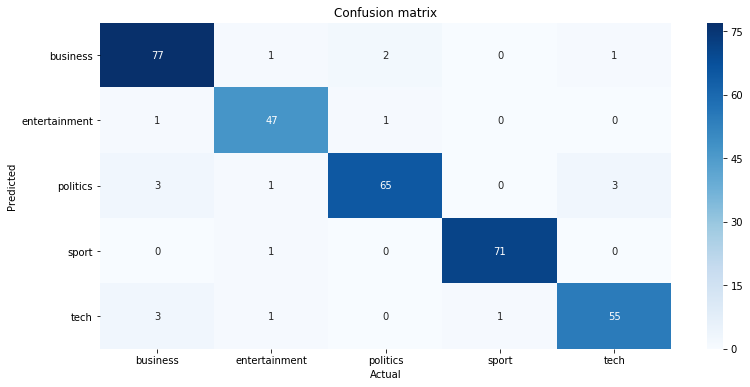

In [13]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, lrc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()